In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Object Columns to Categorical Columns #

In [8]:
obj_2_cat=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for obj in obj_2_cat:
    df[obj]=df[obj].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


# Using One-Hot Encoding to Transform Categorical Data into Numerical #

In [12]:
df = pd.get_dummies(data= df,columns=obj_2_cat,prefix=obj_2_cat)

In [14]:
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


# Checking Correlation Between the Features #

<Axes: >

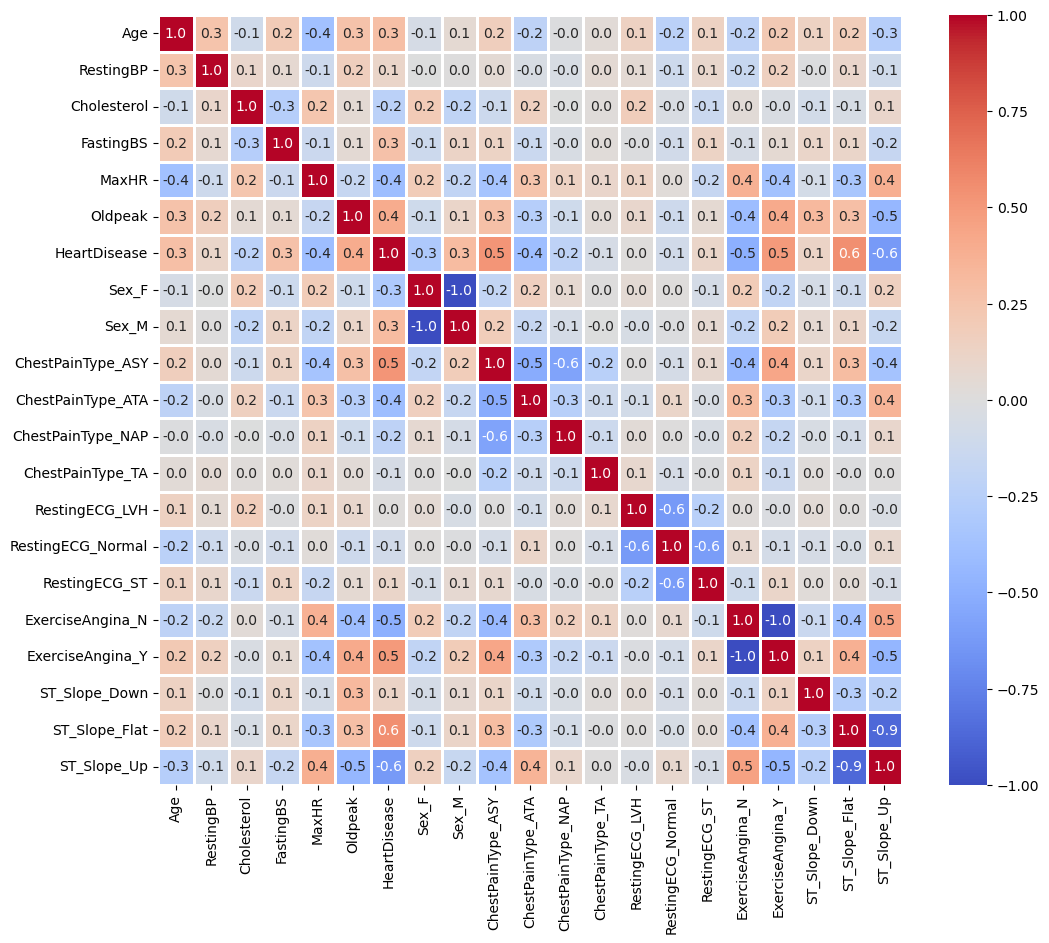

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap='coolwarm',linewidths=2)

# Separating the Target from the Features #

In [18]:
features = df.drop('HeartDisease',axis=1)
target = df['HeartDisease'].copy()

# Splitting the DataSet #

In [20]:
x_train,x_val,y_train,y_val = train_test_split(features,target,random_state=55,shuffle=True,train_size=0.8)

# Bulding the Model #

# 1.Decision Tree #

## Trying Diffrent Samples and Depths to Choose the best ones

In [23]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

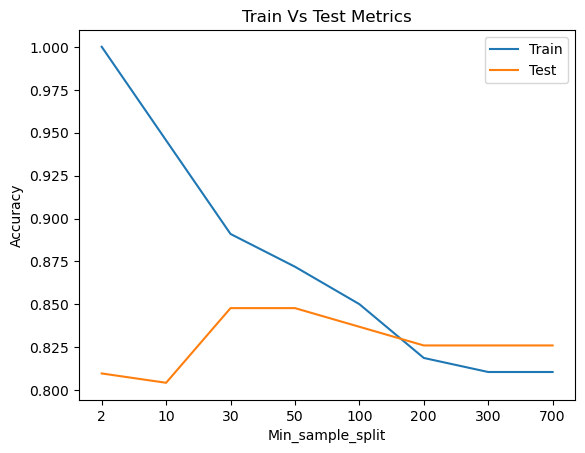

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for min_sample_split in min_samples_split_list:
    model=DecisionTreeClassifier(min_samples_split=min_sample_split,random_state=55).fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = accuracy_score(y_train,pred_train)
    accuracy_val = accuracy_score(y_val , pred_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train Vs Test Metrics')
plt.xlabel('Min_sample_split')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list )
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_val,label='Test')
plt.legend()

## A small number of samples to split on will likely produce over fitting, a moderate Number between 30 - 50 is more acceptable 

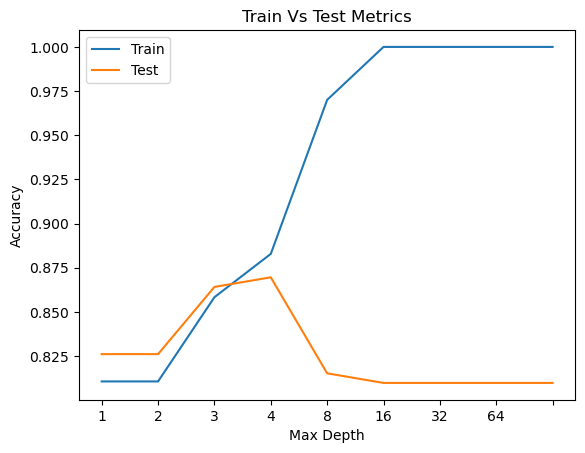

In [27]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model=DecisionTreeClassifier(max_depth=max_depth,random_state=55).fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = accuracy_score(y_train,pred_train)
    accuracy_val = accuracy_score(y_val , pred_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train Vs Test Metrics')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list )
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_val,label='Test')
plt.legend()

## Using a maximum depth between 4-8 is considered acceptable, over 8 the tree is overfitting 

# So, we will choose Max Depth = 4, Max No.Elements = 50 

In [30]:
decision_tree_model=  DecisionTreeClassifier(max_depth=4,min_samples_split=50,random_state=55).fit(x_train,y_train)

In [32]:
print(f'Metrics Train: \n Accuracy Score : {accuracy_score(y_train,decision_tree_model.predict(x_train)):.4f}')
print(f'Metrics Validation: \n Accuracy Score : {accuracy_score(y_val,decision_tree_model.predict(x_val)):.4f}')

Metrics Train: 
 Accuracy Score : 0.8665
Metrics Validation: 
 Accuracy Score : 0.8696


### No Sign of Overfitting, also the accuracy isn't that good

# 2.Random Forest

In [36]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500] # Number of decision trees that make up the forest

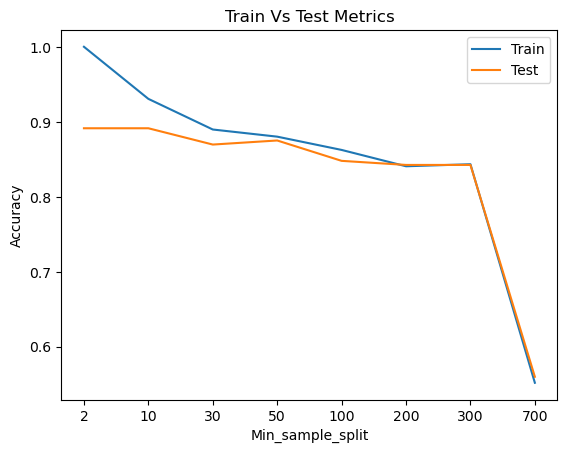

In [38]:
accuracy_list_train=[]
accuracy_list_val=[]
for min_sample_split in min_samples_split_list:
    model=RandomForestClassifier(min_samples_split=min_sample_split,random_state=55).fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_val = accuracy_score(pred_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train Vs Test Metrics')
plt.xlabel('Min_sample_split')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list )
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_val,label='Test')
plt.legend()

## Around Samples = 10 the diffrence in accuracy reduces, makeing it less vulnerable to overfitting  

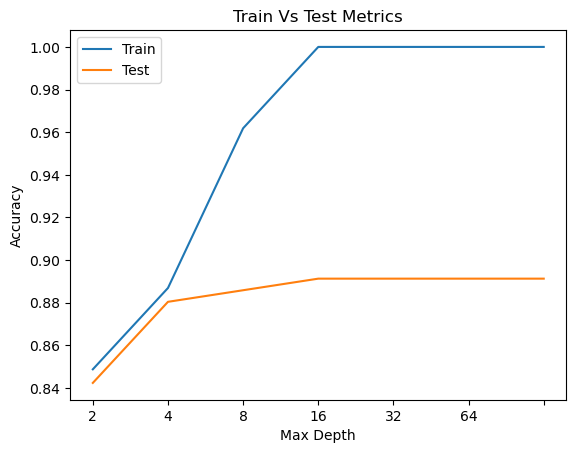

In [40]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model=RandomForestClassifier(max_depth=max_depth,random_state=55).fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = accuracy_score(y_train,pred_train)
    accuracy_val = accuracy_score(y_val , pred_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train Vs Test Metrics')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list )
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_val,label='Test')
plt.legend()

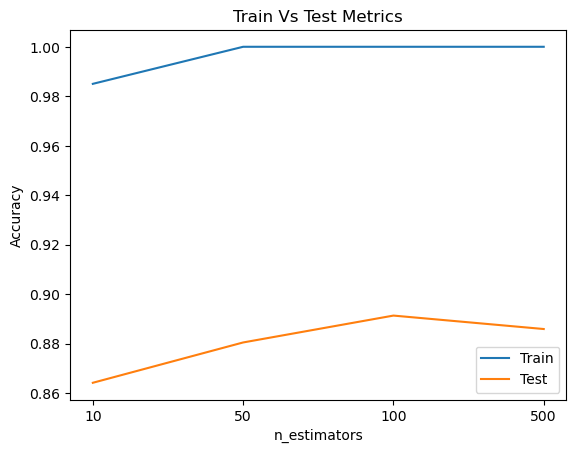

In [44]:
accuracy_list_train = []
accuracy_list_val = []
for estimator in n_estimators_list:
    model=RandomForestClassifier(n_estimators=estimator,random_state=55).fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = accuracy_score(y_train,pred_train)
    accuracy_val = accuracy_score(y_val , pred_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train Vs Test Metrics')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(n_estimators_list)),labels=n_estimators_list )
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_val,label='Test')
plt.legend()

# Hyper Parameters
- Number of samples = 10
- Max Depth = 16
- n_estimators = 100

In [46]:
Random_Forest_Model = RandomForestClassifier(min_samples_split= 10,
                                            max_depth= 16,n_estimators= 100).fit(x_train,y_train)
print(f' Metrics Train : \n Accuracy Score : {accuracy_score(y_train,Random_Forest_Model.predict(x_train)):0.4f} \n Metrics Valid : \n Accuracy Score : {accuracy_score(y_val,Random_Forest_Model.predict(x_val)):0.4f}')


 Metrics Train : 
 Accuracy Score : 0.9414 
 Metrics Valid : 
 Accuracy Score : 0.8804


## We can search for the best combination of hyper parameters using GridSearchCV instead of doing it manually

In [48]:
min_samples_split_list = [2,10, 30]
max_depth_list = [4, 8, 16]
n_estimators_list = [50,100,200]
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':min_samples_split_list, 'max_depth':
max_depth_list, 'n_estimators':n_estimators_list}
clf = GridSearchCV(Random_Forest_Model, parameters)
clf.fit(x_train, y_train)
best_param=clf.best_params_

In [49]:
best_param

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}

In [50]:
Random_Forest_Model = RandomForestClassifier(min_samples_split= 2,
                                             max_depth= 8,
                                             n_estimators= 200).fit(x_train,y_train)
print(f' Metrics Train : \n Accuracy Score : {accuracy_score(y_train,Random_Forest_Model.predict(x_train)):0.4f} \n Metrics Valid : \n Accuracy Score : {accuracy_score(y_val,Random_Forest_Model.predict(x_val)):0.4f}')

 Metrics Train : 
 Accuracy Score : 0.9605 
 Metrics Valid : 
 Accuracy Score : 0.8859


- Note that the new values calculated by the Algorithm have a better accuracy than the manually choosen values

# 3. XGBoost

- We will only use the training data for both training and evaluation

In [54]:
x_train_fit,x_train_eval,y_train_fit,y_train_eval = train_test_split(x_train,y_train,train_size=0.8,random_state=55,shuffle=True)

Note some of the `.fit()` parameters:
- `eval_set = [(X_train_eval,y_train_eval)]`:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets. 
- `early_stopping_rounds`: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
  - The model keeps track of the round with the best performance (lowest evaluation metric).  For example, let's say round 16 has the lowest evaluation metric so far.
  - Each successive round's evaluation metric is compared to the best metric.  If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
  - The model is returned at its last state when training terminated, not its state during the best round.  For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
  - Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).

In [56]:
xgb_model = XGBClassifier (n_estimators= 500, learning_rate=0.1,verbosity=1,random_satae=55,early_stopping_rounds= 10)
xgb_model.fit(x_train_fit,y_train_fit,eval_set=[(x_train_eval,y_train_eval) ],verbose=True)

[0]	validation_0-logloss:0.64379
[1]	validation_0-logloss:0.61227
[2]	validation_0-logloss:0.57987
[3]	validation_0-logloss:0.55726
[4]	validation_0-logloss:0.53572
[5]	validation_0-logloss:0.51911
[6]	validation_0-logloss:0.50419
[7]	validation_0-logloss:0.48945
[8]	validation_0-logloss:0.48012
[9]	validation_0-logloss:0.46953
[10]	validation_0-logloss:0.46610
[11]	validation_0-logloss:0.46085
[12]	validation_0-logloss:0.45447
[13]	validation_0-logloss:0.44876
[14]	validation_0-logloss:0.44477
[15]	validation_0-logloss:0.44325
[16]	validation_0-logloss:0.43825
[17]	validation_0-logloss:0.43583
[18]	validation_0-logloss:0.43509
[19]	validation_0-logloss:0.42989
[20]	validation_0-logloss:0.42617
[21]	validation_0-logloss:0.42378
[22]	validation_0-logloss:0.42152
[23]	validation_0-logloss:0.41876
[24]	validation_0-logloss:0.41771
[25]	validation_0-logloss:0.41913
[26]	validation_0-logloss:0.41941
[27]	validation_0-logloss:0.41903
[28]	validation_0-logloss:0.42009
[29]	validation_0-loglos

C:\Users\userH\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_satae" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_satae=55, ...)

In [58]:
xgb_model.best_iteration

24

In [60]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8859


- In this example, both Random Forest and XGBoost had similar performance (test accuracy).  
